In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("IRIS.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Analysis 

<Axes: xlabel='species', ylabel='count'>

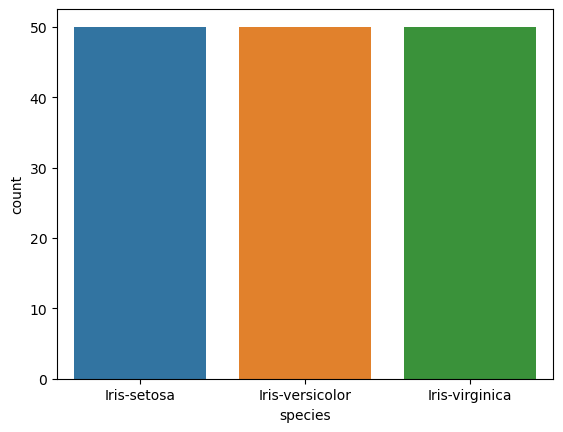

In [5]:
sns.countplot(x = data["species"] , data=data)

<Axes: xlabel='species', ylabel='sepal_length'>

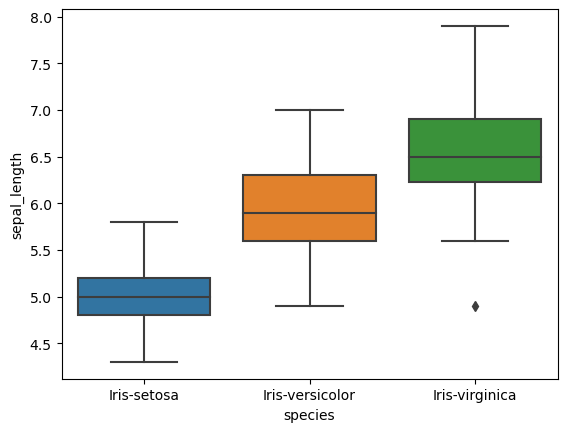

In [6]:
sns.boxplot(x = data['species'] , y=data["sepal_length"] , data=data)

# Iris virginica has greatest sepal length 

<Axes: xlabel='species', ylabel='sepal_width'>

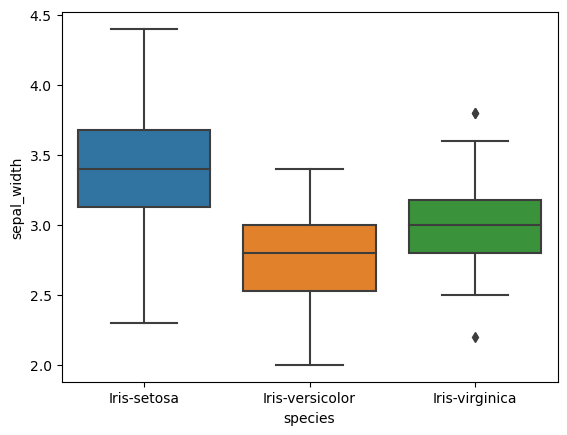

In [7]:
sns.boxplot(x = data['species'] , y=data["sepal_width"] , data=data)

# Iris setosa has greatest sepal width

<Axes: xlabel='species', ylabel='petal_length'>

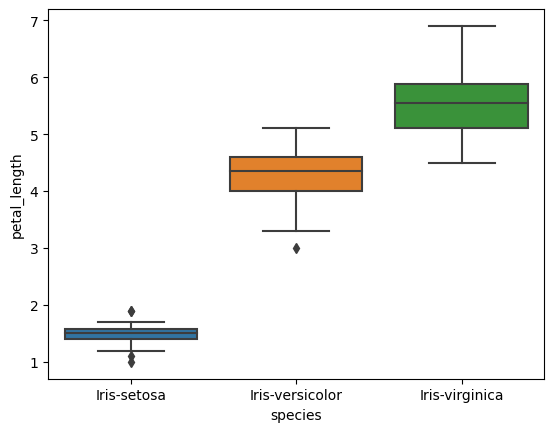

In [8]:
sns.boxplot(x = data['species'] , y=data["petal_length"] , data=data)

# Iris virginica has greatest pethal length 

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
for i in data:
    print(data[i].dtype)
    if(data[i].dtype == object):
        data[i] = le.fit_transform(data[i])
    

float64
float64
float64
float64
object


<Axes: xlabel='species', ylabel='petal_width'>

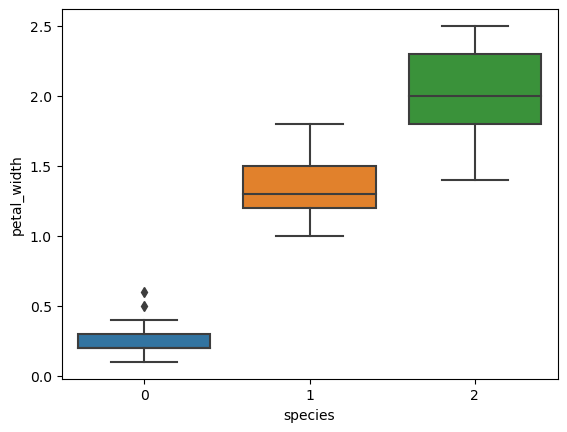

In [12]:
sns.boxplot(x = data['species'] , y=data["petal_width"] , data=data)

# Iris virginica has greatest sepal width 

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = data.drop(['species'] , axis = 1)
y = data['species']

In [17]:
new_x = sc.fit_transform(x)

In [18]:
x_train , x_test , y_train , y_test = train_test_split(new_x , y , test_size = 0.25 , random_state = 25)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()

In [21]:
lr.fit(x_train, y_train)

LogisticRegression()

In [22]:
pred = lr.predict(x_test)

In [38]:
print("accuracy_score: " , accuracy_score(y_test , pred))
print("f1_score: " , f1_score(y_test , pred ))
print("roc_auc_score: " , roc_auc_score(y_test , pred_proba ))
print("confusion_matrix: " , confusion_matrix(y_test , pred ))

accuracy_score:  0.9473684210526315


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [23]:
pred_proba = lr.predict_proba(x_test)

In [24]:
from sklearn.metrics import f1_score , roc_auc_score , confusion_matrix , accuracy_score

In [25]:
print("accuracy_score: " , accuracy_score(y_test , pred))
print("f1_score: " , f1_score(y_test , pred , average='micro'))
print("roc_auc_score: " , roc_auc_score(y_test , pred_proba , multi_class='ovr' ))
print("confusion_matrix: " , confusion_matrix(y_test , pred ))

accuracy_score:  0.9473684210526315
f1_score:  0.9473684210526315
roc_auc_score:  0.9958613916947251
confusion_matrix:  [[11  0  0]
 [ 0 15  1]
 [ 0  1 10]]


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier()

In [28]:
dt.fit(x_train , y_train)

DecisionTreeClassifier()

In [29]:
pred1 = dt.predict(x_test)

In [30]:
pred1_proba = dt.predict_proba(x_test)

In [31]:
print("accuracy_score: " , accuracy_score(y_test , pred1))
print("f1_score: " , f1_score(y_test , pred1 , average='micro'))
print("roc_auc_score: " , roc_auc_score(y_test , pred1_proba , multi_class='ovr' ))
print("confusion_matrix: " , confusion_matrix(y_test , pred1 ))

accuracy_score:  0.9210526315789473
f1_score:  0.9210526315789473
roc_auc_score:  0.9440937149270483
confusion_matrix:  [[11  0  0]
 [ 0 14  2]
 [ 0  1 10]]


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rm = RandomForestClassifier()

In [34]:
rm.fit(x_train , y_train)

RandomForestClassifier()

In [35]:
pred2 = rm.predict(x_test)

In [36]:
pred2_proba = dt.predict_proba(x_test)

In [37]:
print("accuracy_score: " , accuracy_score(y_test , pred2))
print("f1_score: " , f1_score(y_test , pred2 , average='micro'))
print("roc_auc_score: " , roc_auc_score(y_test , pred2_proba , multi_class='ovr' ))
print("confusion_matrix: " , confusion_matrix(y_test , pred2 ))

accuracy_score:  0.9473684210526315
f1_score:  0.9473684210526315
roc_auc_score:  0.9440937149270483
confusion_matrix:  [[11  0  0]
 [ 0 15  1]
 [ 0  1 10]]
